LETTURA DI TUTTI I NOMI DI IMMAGINI NELLA CARTELLA ./olivetti_PNG_master/images/

In [3]:
from PIL import Image
from numpy import asarray
import numpy as np
from scipy.stats import skew

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot

In [4]:
# funzione che calcola il decrittore specificato per l'immagine data in input
# parametri: 
    # imageID: nome del file dell'immagine
    # modelName: nome del descrittore che vogliamo calcolare

def ottieniDescrittore(imageID, modelName):
    # apriamo l'immagine
    image = Image.open('./olivetti_PNG_master/images/' + imageID)

    # convertiamo l'immagine in un numpy array
    data = asarray(image)
    print(data)

    arrayOf64LittleImages = getArrayOf64LittleImages(data)

    match modelName:
        case 'ColorMoments':
            return getColorMoments(arrayOf64LittleImages)
        case 'ELBP':
            return "Not found"
        case 'HOG':
            return "I'm a teapot"
        case _:
            return "Errore, inserire un descrittore corretto"

# funzione che calcola i color moments (mean, std e skewness) per l'immagine data in input
# parametri: 
    # arrayOf64LittleImages: array contenente 64 matrici (ogni matrice corrisponde ad una mattonella)

def getColorMoments(arrayOf64LittleImages):
        # print(arrayOf64LittleImages)

    arrayOfMeans = []  # array che contiene la media di ogni tassello
    arrayOfStd = []  # array che contiene la media di ogni tassello
    arrayOfSkewness = []  # array che contiene la media di ogni tassello
    
    # TODO: riguardare bene la skewness

    for i in range(0, len(arrayOf64LittleImages)):
        # print(arrayOf64LittleImages[i].mean())
        #print("Indice ", i)
        #print(arrayOf64LittleImages[i])
        # arrnp = np.asarray(arrayOf64LittleImages[i])
        # print("MEAN ", arrnp.mean())
        
        arrayOfMeans.append(arrayOf64LittleImages[i].mean())
        arrayOfStd.append(arrayOf64LittleImages[i].std())
        arrayOfSkewness.append(skew(skew(arrayOf64LittleImages[i])))    #TODO: ricontrollare bene come calcolare la skewness totale

    print("\nArray of means")
    print(arrayOfMeans)

    print("\nArray of Std")
    print(arrayOfStd)
    # print(arrayOfSkewness)

    print("\nArray of Skewness")
    print(arrayOfSkewness)

    numpyArrayOfMeans = np.array(arrayOfMeans)
    print("\nTotal mean of image: ", numpyArrayOfMeans.mean())

    numpyArrayOfStd = np.array(arrayOfStd)
    print("\nTotal std of image: ", numpyArrayOfStd.std())

    numpyArrayOfSkew = np.array(arrayOfSkewness)
    print("\nTotal skew of image: ", skew(numpyArrayOfSkew))
    
# funzione che divide l'immagine in input in 64 matrici più piccole (mattonelle)
# parametri: 
    # data: l'immagine in forma di numpy array (ovvero una matrice numerica in cui ogni valore indica il colore del pixel in scala di grigi)

def getArrayOf64LittleImages(data):
    # TODO: riguardare questa cosa di grey scale
    grey_levels = 256

    # Define the window size
    windowsize_r = 8
    windowsize_c = 8

    # questo array contiene tutte le matrici corrispondenti ai vari tasselli dell'immagine grande
    arrayOf64LittleImages = []
    #arr = np.array((0, 3))

    # Crop out the window and calculate the histogram
    for r in range(0, data.shape[0] - windowsize_r, windowsize_r):
        for c in range(0, data.shape[1] - windowsize_c, windowsize_c):
            window = data[r:r+windowsize_r, c:c+windowsize_c]

            window_np = np.asarray(window)
            hist = np.histogram(window, bins=grey_levels)

            # print(window_np)
            imagetest = Image.fromarray(window)
            # print(window.mean(axis=0))
            arrayOf64LittleImages.append(window)
            #arr = np.append(arr, window)
            # print(arr)
            # pyplot.imshow(imagetest, cmap='gray')
            # pyplot.show()

    return arrayOf64LittleImages


In [5]:
ottieniDescrittore('image-1.png', 'ColorMoments')

[[127 133 147 ...  34  32  32]
 [124 137 150 ...  42  41  41]
 [141 149 154 ...  38  39  39]
 ...
 [239 242 246 ...  17  17  17]
 [239 240 245 ...  15  15  15]
 [236 245 242 ...  20  20  20]]

Array of means
[192.46875, 213.15625, 225.765625, 234.21875, 217.8125, 210.40625, 197.703125, 209.328125, 191.890625, 160.328125, 186.125, 214.96875, 183.03125, 172.140625, 216.578125, 185.484375, 159.703125, 173.453125, 218.015625, 154.703125, 157.375, 222.0625, 212.59375, 209.390625, 206.21875, 209.4375, 193.34375, 186.671875, 235.4375, 229.21875, 208.75, 197.34375, 208.1875, 190.46875, 190.375, 236.296875, 237.984375, 208.890625, 183.96875, 167.46875, 192.4375, 141.96875, 218.0, 239.921875, 210.5, 195.828125, 173.203125, 179.984375, 65.640625]

Array of Std
[27.474970854170163, 4.880505705098602, 7.1539809448568565, 6.377373945245801, 3.427257467713799, 4.285581750182815, 10.872384293906052, 9.700281386865795, 30.471358061454612, 37.60072085724388, 28.901502988599052, 9.163393118135879, 35.644

Spiegazione HOG computation: https://www.youtube.com/watch?v=28xk5i1_7Zc

(64, 64)


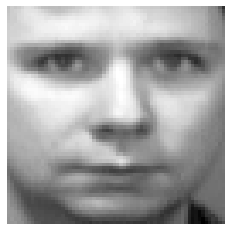

In [59]:
#importing required libraries
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

# reading the image
img = imread('./olivetti_PNG_master/images/image-222.png', 0)
plt.axis("off")
plt.imshow(img, cmap='gray')
print(img.shape)

(128, 64)


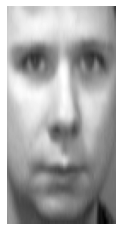

In [68]:
# resizing image
resized_img = resize(img, (128*1, 64*1))    #TODO: capire bene perchè qua su un tutorial scriveva 128 x 4 e 64 x 4
plt.axis("off")
plt.imshow(resized_img, cmap='gray')
print(resized_img.shape)

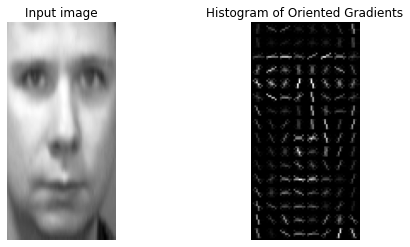

[0.33972548 0.11453241 0.03560741 ... 0.05596208 0.34549558 0.34549558]
3780


In [72]:
#creating hog features
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)

#fd è di lunghezz 3780

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(resized_img, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

print(fd)
print(len(fd))

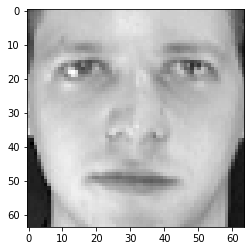

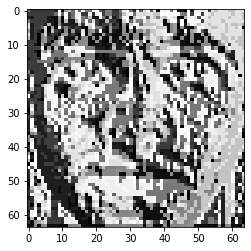

[[120  56  56 ... 224 224 224]
 [ 60  60  60 ... 227 225 193]
 [ 30  28  60 ... 225 227 195]
 ...
 [  0 185   0 ... 223  30   0]
 [ 62  13 146 ... 255  46   3]
 [ 14   6 143 ...  13   6 131]]
LBP Program is finished


In [33]:
#https://www.geeksforgeeks.org/create-local-binary-pattern-of-an-image-using-opencv-python/

import cv2
import numpy as np
from matplotlib import pyplot as plt
   
      
def get_pixel(img, center, x, y):
      
    new_value = 0
      
    try:
        # If local neighbourhood pixel 
        # value is greater than or equal
        # to center pixel values then 
        # set it to 1
        if img[x][y] >= center:
            new_value = 1
              
    except:
        # Exception is required when 
        # neighbourhood value of a center
        # pixel value is null i.e. values
        # present at boundaries.
        pass
      
    return new_value
   
# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):
    
    # pixel che considero come "centro"
    center = img[x][y]
   
    val_ar = []
      
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
      
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
      
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
      
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
      
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
      
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
      
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
      
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
       
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
      
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val
   
path = './olivetti_PNG_master/images/image-0.png'
img_bgr = cv2.imread(path, 1)
   
height, width, _ = img_bgr.shape
   
# We need to convert RGB image 
# into gray one because gray 
# image has one channel only.
img_gray = cv2.cvtColor(img_bgr,
                        cv2.COLOR_BGR2GRAY)
   
# Create a numpy array as 
# the same height and width 
# of RGB image
img_lbp = np.zeros((height, width),
                   np.uint8)
   
for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
  
plt.imshow(img_bgr)
plt.show()
   
plt.imshow(img_lbp, cmap ="gray")
plt.show()

print(img_lbp)
   
print("LBP Program is finished")

In [74]:
def getLBPimage(gray_image):
    '''
    == Input ==
    gray_image  : color image of shape (height, width)
    
    == Output ==  
    imgLBP : LBP converted image of the same shape as 
    '''
    
    print("Step 1")
    ### Step 0: Step 0: Convert an image to grayscale
    #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    gray_image = cv2.cvtColor(img_bgr,
                        cv2.COLOR_BGR2GRAY)
    
    print("Step 2")
    imgLBP = np.zeros_like(gray_image)

    print("Step 3")

    print(gray_image.shape)

    neighboor = 3
    for ih in range(0,gray_image.shape[0] - neighboor):
        for iw in range(0,gray_image.shape[1] - neighboor):
            ### Step 1: 3 by 3 pixel
            img          = gray_image[ih:ih+neighboor,iw:iw+neighboor]

            # print("ih: ", ih)

            # print("ih+neighboor: ", ih+neighboor)

            # print("iw: ", iw)

            # print("iiw+neighboor: ", iw+neighboor)

            # print("stampo img")
            # print(img)

            center       = img[1,1]
            img01        = (img >= center)*1.0  # matrice di 9 pixel che contiene 1 se il valore del pixel è maggiore del valore di center

            img01_vector = img01.T.flatten()

            print(img01)
            print(img01_vector)

            # it is ok to order counterclock manner
            # img01_vector = img01.flatten()
            ### Step 2: **Binary operation**:
            img01_vector = np.delete(img01_vector,4)


            print("DOPO")
            print(img01_vector)

            ### Step 3: Decimal: Convert the binary operated values to a digit.
            where_img01_vector = np.where(img01_vector)[0]
            if len(where_img01_vector) >= 1:
                num = np.sum(2**where_img01_vector)
            else:
                num = 0
            imgLBP[ih+1,iw+1] = num

            print("NUM")
            print(num)

    return(imgLBP)

Step 1
Step 2
Step 3
(64, 64)
[[0. 0. 1.]
 [0. 1. 1.]
 [0. 1. 1.]]
[0. 0. 0. 0. 1. 1. 1. 1. 1.]
DOPO
[0. 0. 0. 0. 1. 1. 1. 1.]
NUM
240
[[0. 0. 1.]
 [0. 1. 1.]
 [0. 1. 1.]]
[0. 0. 0. 0. 1. 1. 1. 1. 1.]
DOPO
[0. 0. 0. 0. 1. 1. 1. 1.]
NUM
240
[[0. 0. 1.]
 [0. 1. 1.]
 [0. 1. 1.]]
[0. 0. 0. 0. 1. 1. 1. 1. 1.]
DOPO
[0. 0. 0. 0. 1. 1. 1. 1.]
NUM
240
[[0. 0. 1.]
 [0. 1. 1.]
 [0. 1. 1.]]
[0. 0. 0. 0. 1. 1. 1. 1. 1.]
DOPO
[0. 0. 0. 0. 1. 1. 1. 1.]
NUM
240
[[0. 0. 1.]
 [0. 1. 1.]
 [0. 1. 1.]]
[0. 0. 0. 0. 1. 1. 1. 1. 1.]
DOPO
[0. 0. 0. 0. 1. 1. 1. 1.]
NUM
240
[[0. 0. 1.]
 [0. 1. 1.]
 [0. 1. 1.]]
[0. 0. 0. 0. 1. 1. 1. 1. 1.]
DOPO
[0. 0. 0. 0. 1. 1. 1. 1.]
NUM
240
[[0. 0. 1.]
 [0. 1. 1.]
 [0. 1. 1.]]
[0. 0. 0. 0. 1. 1. 1. 1. 1.]
DOPO
[0. 0. 0. 0. 1. 1. 1. 1.]
NUM
240
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 1. 1.]]
[0. 0. 1. 1. 1. 1. 0. 0. 1.]
DOPO
[0. 0. 1. 1. 1. 0. 0. 1.]
NUM
156
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]
DOPO
[1. 1. 1. 1. 1. 1. 1. 1.]
NUM
255
[[0. 1. 1.]
 [0. 1. 0.]
 

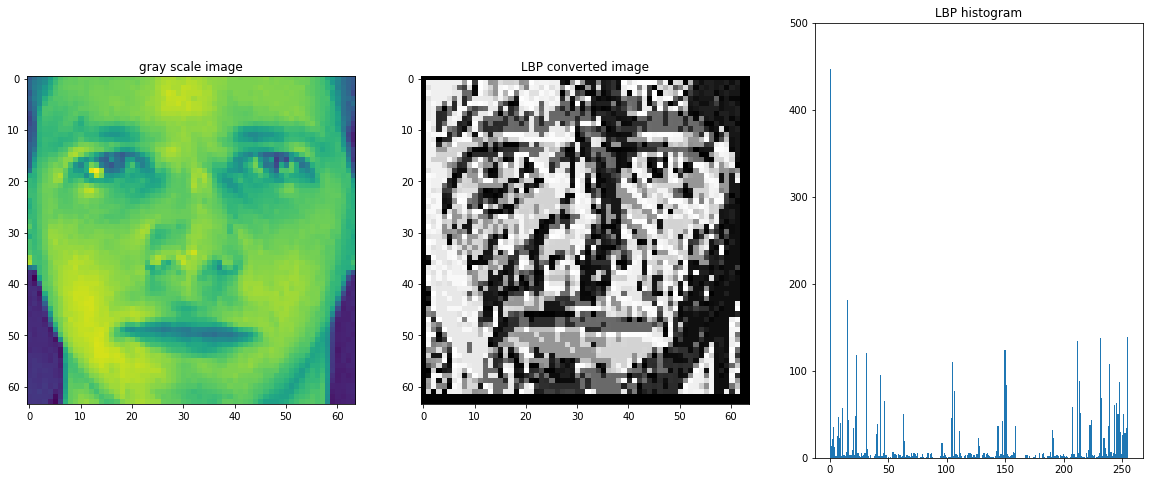

In [75]:
import cv2, os 

# dir_images = "LBPdata/"
# imgs = os.listdir(dir_images)
#for imgnm in imgs:

path = './olivetti_PNG_master/images/image-0.png'
img_bgr = cv2.imread(path, 1)

gray_image = cv2.cvtColor(img_bgr,
                        cv2.COLOR_BGR2GRAY)

imgLBP    = getLBPimage(img_bgr)

print("SONOQUA DOPO IL METODO")

vecimgLBP = imgLBP.flatten()

fig = plt.figure(figsize=(20,8))
ax  = fig.add_subplot(1,3,1)
ax.imshow(gray_image)
ax.set_title("gray scale image")
ax  = fig.add_subplot(1,3,2)
ax.imshow(imgLBP,cmap="gray")
ax.set_title("LBP converted image")
ax  = fig.add_subplot(1,3,3)
freq,lbp, _ = ax.hist(vecimgLBP,bins=2**8)
ax.set_ylim(0,500)
lbp = lbp[:-1]
## print the LBP values when frequencies are high
largeTF = freq > 5000
for x, fr in zip(lbp[largeTF],freq[largeTF]):
    ax.text(x,fr, "{:6.0f}".format(x),color="magenta")
ax.set_title("LBP histogram")
plt.show()